In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/Sample_submission.csv
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/predicate-matrix-continuous.txt
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/predicate-matrix-binary.txt
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/predicates.txt
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/classes.txt
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/02371.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/00767.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/02360.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/00266.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/02450.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/01496.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/01600.jpg
/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/00847.jpg
/kaggle/input/vlg-dataset001/v

# Pixel Play'25 Challenge
# Author : Rishav Kumar , 24112088
# 
# INTRODUCTION 
The primary objective of this is to must identifying animals from unseen classes based information.
# 
# Dataset Overview
# 
*Train Folder - the training set for your model, categories, and images has been given for the remaining classes# 
Test Folder - the test set containing all images that need to be classified. Make a test.csv file for the submission# sample_submission.csv - a sample submission file in the correct format of how the test.csv should look like# 
classes.txt - All (50) classes that the test folder contains (both seen and unseen)# 
predicates.txt - All (85) features that the test folder contains (both seen and unseen)# 
predicate-matrix-binary.txt - A mapping matrix of size (50x85) (binarized)# predicate-matrix-continous.txt - A mapping matrix of size (50x85) (continous)*



In [117]:
# Importing important libraries

import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'


In [192]:
# Defining the data directory
data_dir = '/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2'  
train_dir = os.path.join(data_dir, "train")  # Added this line to set `train_dir`
# Listing the classes
classes = os.listdir(train_dir)

In [195]:
(classes)
# len(classes)

['fox',
 'wolf',
 'horse',
 'antelope',
 'hamster',
 'skunk',
 'chimpanzee',
 'lion',
 'otter',
 'giant+panda',
 'raccoon',
 'hippopotamus',
 'bobcat',
 'pig',
 'rat',
 'spider+monkey',
 'buffalo',
 'mouse',
 'tiger',
 'bat',
 'grizzly+bear',
 'gorilla',
 'dalmatian',
 'killer+whale',
 'siamese+cat',
 'humpback+whale',
 'chihuahua',
 'beaver',
 'polar+bear',
 'german+shepherd',
 'elephant',
 'sheep',
 'collie',
 'moose',
 'zebra',
 'seal',
 'cow',
 'ox',
 'mole',
 'rabbit',
 'giraffe',
 'persian+cat',
 'rhinoceros',
 'dolphin',
 'blue+whale',
 'squirrel',
 'leopard',
 'deer',
 'weasel',
 'walrus']

In [168]:
# Listing the numbers of images per class



from collections import defaultdict


train_dir = '/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/train'


class_counts = defaultdict(int)


for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  
        class_counts[class_name] = len(os.listdir(class_path))


for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")


total_images = sum(class_counts.values())
print(f"\nVerified total images: {total_images}")

Class: fox, Number of images: 469
Class: wolf, Number of images: 250
Class: horse, Number of images: 142
Class: antelope, Number of images: 250
Class: hamster, Number of images: 250
Class: skunk, Number of images: 188
Class: chimpanzee, Number of images: 133
Class: lion, Number of images: 250
Class: otter, Number of images: 250
Class: giant+panda, Number of images: 250
Class: raccoon, Number of images: 250
Class: hippopotamus, Number of images: 250
Class: bobcat, Number of images: 250
Class: pig, Number of images: 250
Class: rat, Number of images: 250
Class: spider+monkey, Number of images: 250
Class: buffalo, Number of images: 250
Class: mouse, Number of images: 185
Class: tiger, Number of images: 250
Class: bat, Number of images: 239
Class: grizzly+bear, Number of images: 250
Class: gorilla, Number of images: 230
Class: dalmatian, Number of images: 250
Class: killer+whale, Number of images: 250
Class: siamese+cat, Number of images: 250
Class: humpback+whale, Number of images: 250
Cla

In [172]:
# Define transformations for both training and validation datasets


transform_train = tt.Compose([
    tt.Resize((224, 224)),        
    tt.RandomHorizontalFlip(),    
    tt.RandomRotation(10),        
    tt.ToTensor(),                
    tt.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalization (pretrained model standard)
])

transform_val = tt.Compose([
    tt.Resize((224, 224)),        
    tt.ToTensor(),                
    tt.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalization
])


In [176]:


import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms
dataset = ImageFolder(train_dir, transform=train_transform)


# Loading the entire dataset from the same directory (I only have one directory for both train and val)
full_dataset = datasets.ImageFolder(root=train_dir)

# Splitting the dataset into training and validation sets (80% for training and 20% for validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Now we apply the correct transformations
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)  # Applying training transformations
val_dataset = datasets.ImageFolder(root=train_dir, transform=transform_val)      # Applying validation transformations

# Creating DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


## Transforming test dataset using custom implementation as there is no lebels in test data , test datasets only contain the images for which predictions need to be made. Therefore, in the TestDataset, I return both the image and the image path so that I can keep track of which image corresponds to which prediction.

In [177]:
from torchvision.datasets import DatasetFolder
from PIL import Image

class TestDataset(torch.utils.data.Dataset):
    def __init__(self, test_dir, transform=None):
        self.test_dir = test_dir
        self.image_files = sorted(os.listdir(test_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.test_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, self.image_files[idx]


test_dir = '/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test'
test_transform = tt.Compose([
    tt.Resize((224, 224)),
    tt.ToTensor(),
    tt.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_dataset = TestDataset(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

print(f"Number of test images: {len(test_dataset)}")


Number of test images: 3000


## Seeing some batch of images 

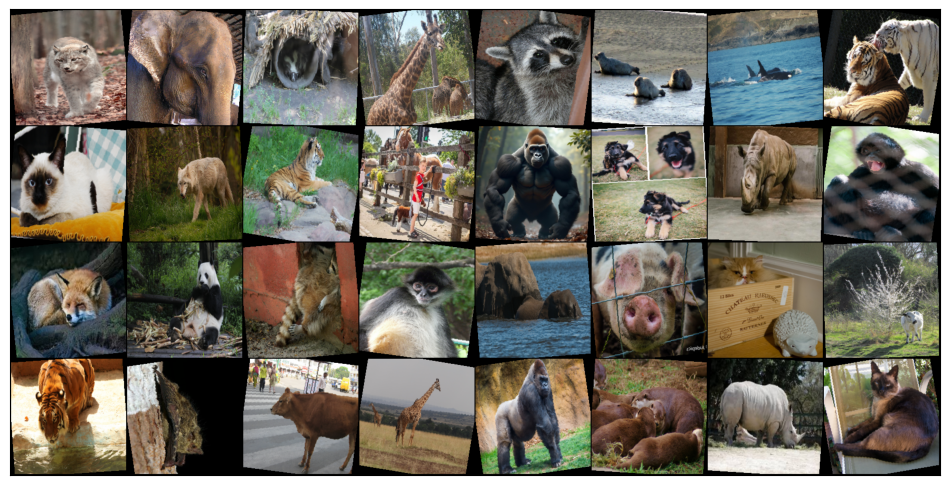

In [178]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

# Define stats for normalization
stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Denormalization function
def denormalize(images, means, stds):
    means = torch.tensor(means, device=images.device).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds, device=images.device).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])  # Hide axes
        # Denormalize the images
        denorm_images = denormalize(images, *stats)
        # Display the grid of images
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).cpu().clamp(0, 1))
        plt.show()
        break  # Show only the first batch

# Show a batch from the train_loader
show_batch(train_loader)


##  Classes for handling device placement (GPU or CPU). get_default_device() selects the device (GPU if available, otherwise CPU). to_device() moves data (tensors or lists/tuples of tensors) to the chosen device.

## SPEED IS KEY !

In [179]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [180]:
device = get_default_device()
device

device(type='cuda')

# Loading train and validation using dataloader

In [181]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

## loading a pre-trained ResNet-50 model, unfroze the weights in the layer4 block to allow training, replaces the final fully connected layer with a custom block (containing a new linear layer, ReLU activation, dropout, and another linear layer for 50 classes), and moves the model to the specified device (GPU).

In [182]:
from torchvision import models
import torch.nn as nn

# load the pretrained ResNet-50 model
model = models.resnet50(pretrained=True)

# unfreeze more layers
for param in model.layer4.parameters():
    param.requires_grad = True


# replace the fully connected layer with a custom block
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),  # new fully connected layer
    nn.ReLU(),  # Activation function
    nn.Dropout(p=0.5),  # dropout layer to reduce overfitting
    nn.Linear(512, 50)  # output layer (50 classes)
)

# unfreeze the final layers (fully connected layer)
for param in model.fc.parameters():
    param.requires_grad = True

# move the model to the correct device (GPU)
model = to_device(model, device)


In [183]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 

## Setting up the loss function (CrossEntropyLoss) for multi-class classification, the optimizer (Adam) with a learning rate of 0.0001 and weight decay, and a learning rate scheduler (StepLR) that reduces the learning rate by a factor of 0.1 every 5 epochs.

In [184]:
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

# CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()

# Adam optimizer 
optimizer = Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Scheduler 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


## Defining train epoch and validation epoch function. The train_epoch function trains the model for one epoch, calculating loss and accuracy, and updating weights using backpropagation. The validate_epoch function evaluates the model's performance on the validation set, calculates loss and accuracy, and updates the learning rate scheduler if provided.

In [185]:
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = to_device((images, labels), device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


def validate_epoch(model, val_loader, criterion, scheduler=None):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = to_device((images, labels), device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = correct / total

    # update learning rate scheduler based on validation accuracy
    if scheduler:
        scheduler.step(epoch_acc)

    return epoch_loss, epoch_acc

In [186]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True ## To truncate the images


## 


## Training of model for 10 epoch on train and val data , saving the best model and visaualizing the trends.


Epoch 1/10
Train Loss: 1.4408, Train Accuracy: 0.6449
Validation Loss: 0.3701, Validation Accuracy: 0.8932
Best model saved!
Learning Rate: 0.000100
Epoch 2/10
Train Loss: 0.5168, Train Accuracy: 0.8487
Validation Loss: 0.2299, Validation Accuracy: 0.9284
Best model saved!
Learning Rate: 0.000100
Epoch 3/10
Train Loss: 0.3486, Train Accuracy: 0.8969
Validation Loss: 0.1647, Validation Accuracy: 0.9470
Best model saved!
Learning Rate: 0.000100
Epoch 4/10
Train Loss: 0.2809, Train Accuracy: 0.9134
Validation Loss: 0.1301, Validation Accuracy: 0.9591
Best model saved!
Learning Rate: 0.000100
Epoch 5/10
Train Loss: 0.2368, Train Accuracy: 0.9280
Validation Loss: 0.1171, Validation Accuracy: 0.9633
Best model saved!
Learning Rate: 0.000100
Epoch 6/10
Train Loss: 0.2027, Train Accuracy: 0.9379
Validation Loss: 0.0830, Validation Accuracy: 0.9720
Best model saved!
Learning Rate: 0.000100
Epoch 7/10
Train Loss: 0.1660, Train Accuracy: 0.9483
Validation Loss: 0.0837, Validation Accuracy: 0.9723

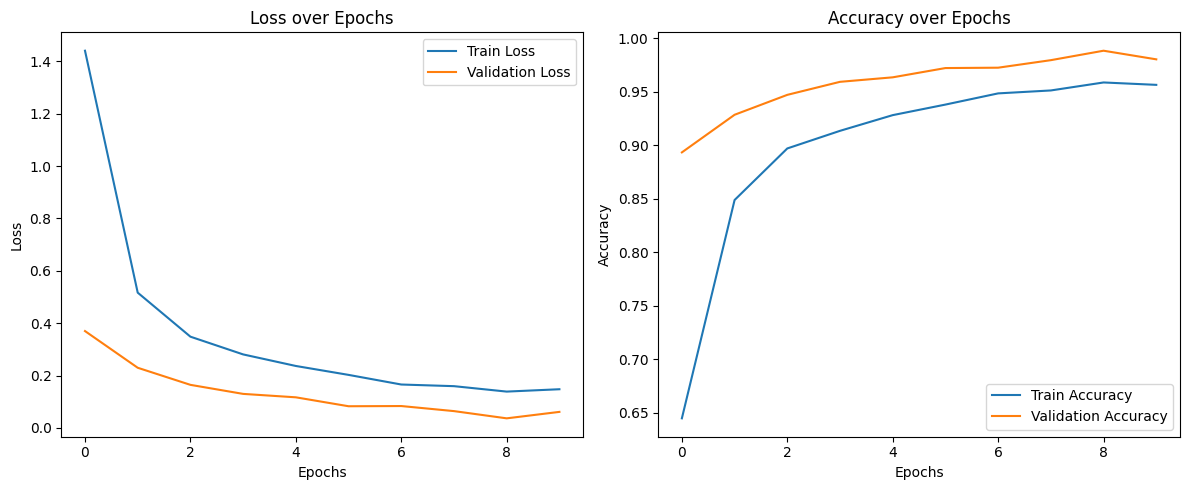

In [187]:
# Train and validate in each epoch
best_val_acc = 0.0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train the model
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validate the model
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, scheduler)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Save the model with the best validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        print("Best model saved!")

    # Step the scheduler only after validation
    scheduler.step(val_acc)

    # Print the learning rate for monitoring
    print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

# Plot training and validation loss curves
plt.figure(figsize=(12, 5))

# Plotting loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Plotting accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [188]:
# List all files in the working directory
os.listdir('/kaggle/working/')

['.virtual_documents', 'best_model.pth']

## Processing of pre trained model for new task , loading a trained model checkpoint and prepairing it for interfere 

In [189]:
import torch
from torch import nn
from torchvision import models

# 1. Define our model architecture
best_model = models.resnet50(pretrained=False)  # Initialize model structure
num_features = best_model.fc.in_features
best_model.fc = nn.Linear(num_features, 50)    # Modify fully connected layer to match class count

# 2. Load the checkpoint and inspect the structure
checkpoint_path = "/kaggle/working/best_model.pth"
checkpoint = torch.load(checkpoint_path, map_location=device)

# Printing the structure of the checkpoint to inspect available keys
print("Checkpoint keys:", checkpoint.keys())

# 3. If 'state_dict' is present, loading the model weights
if 'state_dict' in checkpoint:
    best_model.load_state_dict(checkpoint['state_dict'], strict=False)
else:
    # If no 'state_dict' key, try loading the checkpoint directly
    best_model.load_state_dict(checkpoint, strict=False)

# 4. Move the model to the appropriate device (GPU)
best_model = best_model.to(device)

# 5. Set the model to evaluation mode
best_model.eval()



Checkpoint keys: odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', '

<ipython-input-189-be4751447e62>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Evaluating model on test data 

In [190]:

def evaluate_test(model, test_loader):
    model.eval()  # setting model on evaluate mode
    predictions = []
    image_files = []
    with torch.no_grad():
        for images, file_names in test_loader:
            images = images.to(device)  
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            image_files.extend(file_names)
    return list(zip(image_files, predictions))


test_results = evaluate_test(best_model, test_loader)
print(f"Test set predictions: {test_results[:30]}")  # Print a sample of predictions


Test set predictions: [('00001.jpg', 1), ('00002.jpg', 11), ('00003.jpg', 40), ('00004.jpg', 21), ('00005.jpg', 6), ('00006.jpg', 32), ('00007.jpg', 32), ('00008.jpg', 6), ('00009.jpg', 21), ('00010.jpg', 45), ('00011.jpg', 21), ('00012.jpg', 32), ('00013.jpg', 6), ('00014.jpg', 32), ('00015.jpg', 6), ('00016.jpg', 11), ('00017.jpg', 21), ('00018.jpg', 24), ('00019.jpg', 21), ('00020.jpg', 6), ('00021.jpg', 21), ('00022.jpg', 32), ('00023.jpg', 11), ('00024.jpg', 24), ('00025.jpg', 1), ('00026.jpg', 6), ('00027.jpg', 6), ('00028.jpg', 6), ('00029.jpg', 28), ('00030.jpg', 40)]


In [161]:
train_class_names = ['antelope',
 'bat',
 'beaver',
 'blue+whale',
 'bobcat',
 'buffalo',
 'chihuahua',
 'chimpanzee',
 'collie',
 'cow',
 'dalmatian',
 'deer',
 'dolphin',
 'elephant',
 'fox',
 'german+shepherd',
 'giant+panda',
 'giraffe',
 'gorilla',
 'grizzly+bear',
 'hamster',
 'hippopotamus',
 'horse',
 'humpback+whale',
 'killer+whale',
 'leopard',
 'lion',
 'mole',
 'moose',
 'mouse',
 'otter',
 'ox',
 'persian+cat',
 'pig',
 'polar+bear',
 'rabbit',
 'raccoon',
 'rat',
 'rhinoceros',
 'seal',
 'sheep',
 'siamese+cat',
 'skunk',
 'spider+monkey',
 'squirrel',
 'tiger',
 'walrus',
 'weasel',
 'wolf',
 'zebra']

classes.sort()
classes

print(len(train_class_names))

50


Getting our best model , saved earlier 

In [196]:
## LESS goooooo
best_model_path = '/kaggle/working/best_model.pth'
model.load_state_dict(torch.load(best_model_path))
model.to(device)  # moving model to the device (CPU/GPU)
model.eval()  # setting the model to evaluation mode


<ipython-input-196-c7954e93eeea>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#Transforming test dataset using custom implementation as there is no lebels in test data , test datasets only contain the images for which predictions need to be made. Therefore, in the TestDataset, I return both the image and the image path so that I can keep track of which image corresponds to which prediction.(DONE EARLIER)

In [198]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Custom Dataset for test images
class TestDataset(Dataset):
    def __init__(self, test_dir, transform=None):
        self.test_dir = test_dir
        self.image_paths = [os.path.join(test_dir, img) for img in os.listdir(test_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")  # Ensure 3-channel images
        if self.transform:
            image = self.transform(image)
        return image, image_path  # Return both image and path for identification

# path of test images
test_dir = "/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test"

# Define transformations 
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create test dataset and loader
test_dataset = TestDataset(test_dir=test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


# Getting results for test datset.

In [200]:
# Perform inference
results = []
with torch.no_grad():
    for images, image_paths in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get class with the highest probability
        for img_path, pred in zip(image_paths, preds):
            results.append((os.path.basename(img_path), pred.item()))  # Save image name and predicted class




# Assigning names to classes

In [204]:
class_to_idx = train_dataset.class_to_idx  
idx_to_class = {v: k for k, v in class_to_idx.items()}
class_num = 49  # This is one of the class numbers in my results
class_label = idx_to_class[class_num]
print(f"Class number {class_num} corresponds to label '{class_label}'")
labeled_results = [(img_id, idx_to_class[class_num]) for img_id, class_num in results]



Class number 49 corresponds to label 'zebra'


In [205]:
labeled_results[:20]

[('02371.jpg', 'siamese+cat'),
 ('00767.jpg', 'buffalo'),
 ('02360.jpg', 'collie'),
 ('00266.jpg', 'wolf'),
 ('02450.jpg', 'moose'),
 ('01496.jpg', 'german+shepherd'),
 ('01600.jpg', 'rhinoceros'),
 ('00847.jpg', 'mouse'),
 ('00822.jpg', 'beaver'),
 ('00614.jpg', 'squirrel'),
 ('02856.jpg', 'gorilla'),
 ('02621.jpg', 'humpback+whale'),
 ('01850.jpg', 'persian+cat'),
 ('00878.jpg', 'spider+monkey'),
 ('01473.jpg', 'moose'),
 ('00091.jpg', 'dolphin'),
 ('01713.jpg', 'chimpanzee'),
 ('01306.jpg', 'seal'),
 ('00838.jpg', 'persian+cat'),
 ('01760.jpg', 'lion')]

In [206]:
# Sorting of the list 
labeled_results = sorted(labeled_results, key=lambda x: x[0])

# CSV Creation !

In [218]:
# File name for the CSV
import csv
csv_file_name = "labeled_results.csv"

# Write to CSV file
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['image_id', 'class'])
    # Write the data
    writer.writerows(labeled_results)

print(f"CSV file '{csv_file_name}' has been created!")

CSV file 'labeled_results.csv' has been created!


#### Seeing the 5 images

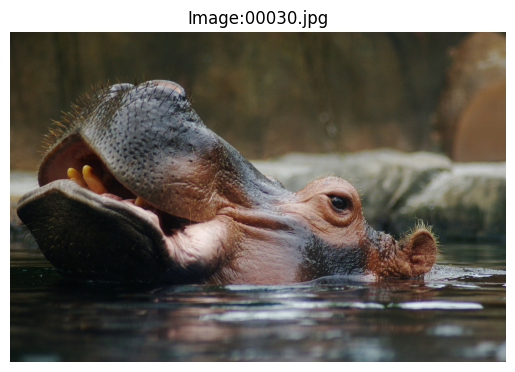

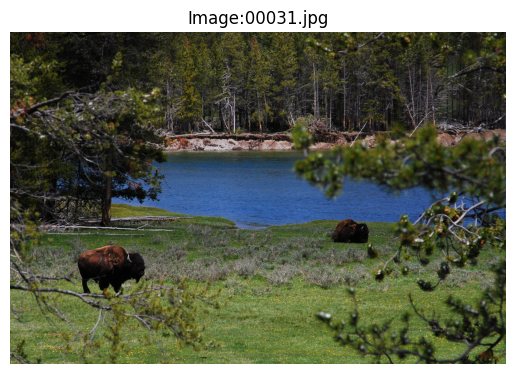

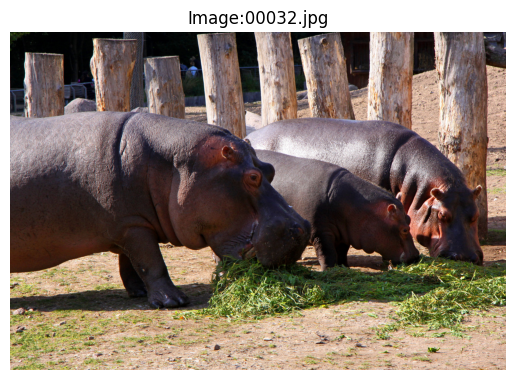

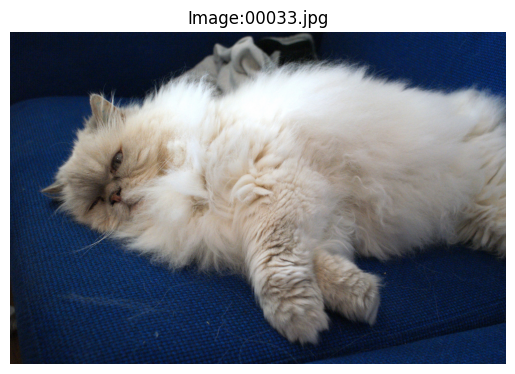

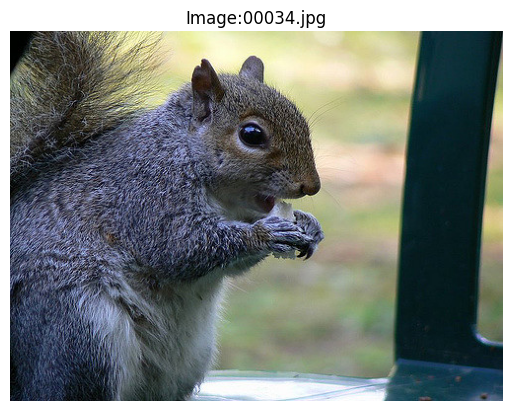

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/kaggle/input/vlg-dataset001/vlg-dataset-2/vlg-dataset-2/test/0003'

for i in range(5):
    path = image_path + str(i) + '.jpg'
    # Load the image
    img = mpimg.imread(path)

    # Plot the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f'Image:{"0003"+str(+i)+".jpg"}')  # Add the filename as title
    plt.show()
    


In [ ]:
00030.jpg	hippopotamus
00031.jpg	buffalo
00032.jpg	hippopotamus
00033.jpg	persian+cat
00034.jpg	squirrel

## THANK YOU 
## Learned a lot!